In [116]:
import pandas as pd
all_data = pd.read_csv('./all_data.csv')
ques_morning_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
ques_evening_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

ques_morning_dams = ques_morning_dams[['user_id','date','positive_score','depressive_score','anxious_score']]
ques_evening_dams = ques_evening_dams[['user_id','date','positive_score','depressive_score','anxious_score']]

In [117]:
all_data_use = all_data[['user_id','date','食事','単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）', '移動', 'web会議', 'その他', '業務外作業','対面会議', '共同作業（コミュニケーションを伴う）', '電話（会議）','age','sex','コア業務（自身が本来担当している業務）','ノンコア業務（自身が本来担当ではない業務）']]
cluster_data = pd.merge(all_data_use, ques_morning_dams, on=['user_id','date'])
cluster_data = pd.merge(cluster_data, ques_evening_dams, on=['user_id','date'])

In [118]:
cluster_data = cluster_data.rename(columns={
'食事':'meals',
'単独作業':'working_alone', 
'趣味・休憩':'hobbies/breaks', 
'家事・育児':'housework/childcare', 
'休憩（業務時間内）':'breaks(induty)', 
'移動':'travel', 
'web会議':'web_conference', 
'その他':'other', 
'業務外作業':'non_work',
'対面会議':'facettoface_meetings', 
'共同作業（コミュニケーションを伴う）':'collaborative_work', 
'電話（会議）':'telephone(conference)'})
task_columns = cluster_data[[
     'meals',
    'working_alone', 
    'hobbies/breaks', 
    'housework/childcare', 
    'breaks(induty)', 
    'travel', 
    'web_conference', 
    'other', 
    'non_work',
    'facettoface_meetings', 
    'collaborative_work', 
    'telephone(conference)']].columns
cluster_data.loc[cluster_data['meals']<0, 'meals']=0
cluster_data.loc[cluster_data['working_alone']<0, 'working_alone']=0
cluster_data.loc[cluster_data['hobbies/breaks']<0, 'hobbies/breaks']=0
cluster_data.loc[cluster_data['housework/childcare']<0, 'housework/childcare']=0
cluster_data.loc[cluster_data['breaks(induty)']<0, 'breaks(induty)']=0
cluster_data.loc[cluster_data['travel']<0, 'travel']=0
cluster_data.loc[cluster_data['web_conference']<0, 'web_conference']=0
cluster_data.loc[cluster_data['other']<0, 'other']=0
cluster_data.loc[cluster_data['non_work']<0, 'non_work']=0
cluster_data.loc[cluster_data['facettoface_meetings']<0, 'facettoface_meetings']=0
cluster_data.loc[cluster_data['collaborative_work']<0, 'collaborative_work']=0
cluster_data.loc[cluster_data['telephone(conference)']<0, 'telephone(conference)']=0
cluster_data['age']=cluster_data['age'].fillna(43)



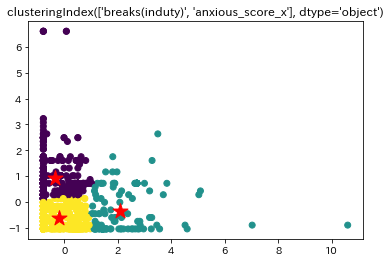

In [142]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np
import japanize_matplotlib

X=cluster_data[[
   #   'meals',
   #  'working_alone', 
   #  'hobbies/breaks', 
   #  'housework/childcare', 
    'breaks(induty)', 
   #  'travel', 
   #  'web_conference', 
   #  'other', 
   #  'non_work',
   #  'facettoface_meetings', 
   #  'collaborative_work', 
   #  'telephone(conference)',
      #   'age',
      #  'sex',
    #      'コア業務（自身が本来担当している業務）', 'ノンコア業務（自身が本来担当ではない業務）',
      #  'positive_score_x'
      #  'depressive_score_x', 
    'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
       ]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
# クラスタリング
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)
# 結果を出力
columns=X.columns
plt.title('clustering{}'.format(columns))
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [120]:
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from pyclustering.cluster import gmeans, xmeans
import itertools

In [128]:
X=cluster_data[[
    # 'meals',
    'working_alone'
    # 'hobbies/breaks', 
    # 'housework/childcare',
    # 'breaks(induty)',
    # 'travel',
    # 'web_conference',
    # 'other', 
    # 'non_work',
    # 'facettoface_meetings',
    # 'collaborative_work', 
    # 'telephone(conference)'
       ]]
Y=cluster_data[[       'positive_score_x'
    #    'depressive_score_x', 'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
    ]]

## Xmeans法を用いたクラスタリング

In [92]:
#　pcaで次元圧縮
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vecs_list=pca.fit_transform(X)

# # 元データをプロット
# fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=Y)
# fig.show()

pred = KMeans(n_clusters=8).fit_predict(X)

# k-meansによるクラスタをプロット
x_columns = X.columns
y_columns = Y.columns
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=pred,
                title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()

# X-means
xmeans_instance = xmeans.xmeans(X).process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

labels_size = len(
    list(itertools.chain.from_iterable(clusters))
)
labels = np.zeros((1, labels_size))
for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

# x-meansによるクラスタをプロット
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=labels,
                      title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



0       41.0
1       43.0
2       26.0
3       30.0
4       44.0
        ... 
1262    53.0
1263    53.0
1264    53.0
1265    53.0
1266    39.0
Name: age, Length: 1267, dtype: float64